In [ ]:
import os
import pandas as pd
import cv2
import numpy as np
from google.colab import drive
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
# Montar o Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Exemplo de aplicação de pré-processamento a uma imagem
def preprocess_image(imagem, resize=True, W=100, L=143):
    # Aqui, você pode realizar qualquer pré-processamento adicional necessário para a imagem
    imagens_preprocessadas = tf.cast(imagem, tf.float32)

    if resize:
      # Expand dimensions to make it 3D
      imagens_preprocessadas = tf.expand_dims(imagens_preprocessadas, axis=2)

      # Resize the image
      imagens_preprocessadas = tf.image.resize(imagens_preprocessadas, [W, L])

      # Reshape the image to (28, 28, 1) to make it compatible with Conv2D input shape
      imagens_preprocessadas = tf.reshape(imagens_preprocessadas, [W, L, 1])

      # Remove the extra dimension added by tf.expand_dims
      imagens_preprocessadas = tf.squeeze(imagens_preprocessadas, axis=-1)  # Squeeze the last dimension

    return imagens_preprocessadas

In [ ]:
# Caminhos para os diretórios
caminho_csv = "/content/drive/MyDrive/Colab LFUI/Colab Notebooks/data set/data_18_12_23/CSV"
caminho_imagens = "/content/drive/MyDrive/Colab LFUI/Colab Notebooks/Alex_dataset"

# Listar arquivos CSV
arquivos_csv = [arq for arq in os.listdir(caminho_csv) if arq.endswith('.csv')]
tamanho_do_set = len(arquivos_csv)
print(f'O tamanho do arquivos_csv é: {tamanho_do_set}', end='\n\n')

# Listar arquivos PNG
arquivos_png = [arq for arq in os.listdir(caminho_imagens) if arq.endswith('.png')]
tamanho_do_set = len(arquivos_png)
print(f'O tamanho do arquivos_png é: {tamanho_do_set}', end='\n\n')

# Extrair timestamps dos arquivos CSV
timestamps_csv = set([arquivo_csv.split('_')[3].split('.')[0] for arquivo_csv in arquivos_csv])
tamanho_do_set = len(timestamps_csv)
print(f'O tamanho do timestamps_csv é: {tamanho_do_set}', end='\n\n')

# Extrair timestamps dos arquivos PNG
timestamps_png = set([arquivo_png.split('_')[3].split('.')[0] for arquivo_png in arquivos_png])
tamanho_do_set = len(timestamps_png)
print(f'O tamanho do timestamps_png é: {tamanho_do_set}', end='\n\n')

# Exibir timestamps únicos de cada lista
print("Timestamps únicos CSV:")
print(timestamps_csv)

print("\nTimestamps únicos PNG:")
print(timestamps_png)

# Verificar se há correspondência de timestamps entre os arquivos CSV e PNG
correspondencia_timestamp = timestamps_csv.intersection(timestamps_png)
print(f"\nCorrespondência de timestamps:")
print(correspondencia_timestamp, end='\n\n')
tamanho_do_set = len(correspondencia_timestamp)
print(f'O tamanho do correspondencia_timestamp é: {tamanho_do_set}')

O tamanho do arquivos_csv é: 506

O tamanho do arquivos_png é: 506

O tamanho do timestamps_csv é: 506

O tamanho do timestamps_png é: 506

Timestamps únicos CSV:
{'153244', '152816', '153654', '152227', '153742', '153447', '153525', '153930', '153733', '153042', '153625', '152804', '153223', '153115', '152438', '153420', '153429', '153438', '153121', '152414', '154118', '153335', '152224', '153124', '154054', '152637', '152426', '153513', '154403', '152329', '153812', '153507', '153323', '153543', '153842', '152907', '152553', '152100', '153903', '152432', '154324', '152948', '153827', '153658', '153356', '150527', '153332', '153815', '154145', '152649', '154045', '154203', '152326', '153353', '152042', '152209', '152801', '152450', '153540', '153921', '154206', '154414', '153431', '152940', '154236', '152151', '150511', '153736', '152849', '154042', '152036', '153220', '153054', '154139', '154417', '153945', '154103', '153719', '153519', '152919', '153531', '153710', '153924', '15201

In [ ]:
# Criar um dicionário para armazenar os elementos correspondentes
dados_por_timestamp = {}
scaler = StandardScaler()

# Iterar sobre os arquivos CSV
for arquivo_csv in arquivos_csv:
    timestamp = arquivo_csv.split('_')[3].split('.')[0]
    caminho_completo_csv = os.path.join(caminho_csv, arquivo_csv)

    # Ler o conteúdo do arquivo CSV e extrair os 3 valores relevantes
    with open(caminho_completo_csv, 'r') as f_csv:
        conteudo_csv = f_csv.read()
        valores_zernike = np.array([round(float(valor), 2) for valor in conteudo_csv.split(',')[3:6]])

    # Verificar se o timestamp já existe no dicionário
    if timestamp not in dados_por_timestamp:
        dados_por_timestamp[timestamp] = {'zernike': valores_zernike}
    else:
        dados_por_timestamp[timestamp]['zernike'] = valores_zernike

# Iterar sobre os arquivos PNG
for arquivo_png in arquivos_png:
    timestamp = arquivo_png.split('_')[3].split('.')[0]
    caminho_completo_png = os.path.join(caminho_imagens, arquivo_png)

    # Ler a imagem PNG e realizar qualquer pré-processamento necessário
    imagem = cv2.imread(caminho_completo_png, cv2.IMREAD_GRAYSCALE)  # Carregar imagem em escala de cinza (se necessário)

    imagens_preprocessadas = preprocess_image(imagem)

    # Verificar se o timestamp já existe no dicionário
    if timestamp not in dados_por_timestamp:
        dados_por_timestamp[timestamp] = {'imagem': imagens_preprocessadas}
    else:
        dados_por_timestamp[timestamp]['imagem'] = imagens_preprocessadas

# Agora, 'dados_por_timestamp' contém os elementos correspondentes agrupados pelo timestamp
# Estruture esses dados conforme necessário para treinar sua rede neural

# Exemplo de como acessar os dados para um timestamp específico
timestamp_exemplo = '154453'
dados_exemplo = dados_por_timestamp[timestamp_exemplo]
print(f'Dados para o timestamp {timestamp_exemplo}: {dados_exemplo}')

Dados para o timestamp 154453: {'zernike': array([-0.1 ,  0.68,  0.07]), 'imagem': <tf.Tensor: shape=(100, 143), dtype=float32, numpy=
array([[ 1.7862587,  2.1293707,  1.8408042, ...,  1.29     ,  1.       ,
         1.7097778],
       [ 2.6552448,  2.7742655,  2.4775875, ...,  1.1300001,  1.0168173,
         1.1300001],
       [ 1.8403846,  1.5211537,  1.2480769, ...,  1.4951049,  1.0711502,
         1.5209779],
       ...,
       [40.643772 , 31.002384 , 27.12342  , ...,  4.352112 ,  4.8835692,
         3.1306036],
       [43.090034 , 27.435257 , 27.890728 , ...,  4.       ,  4.7574625,
         3.2902222],
       [34.610653 , 30.456717 , 24.261616 , ...,  4.0411167,  4.252492 ,
         3.2902222]], dtype=float32)>}


In [ ]:
# Lista de timestamps no conjunto de dados
timestamps = list(dados_por_timestamp.keys())
rotulos = np.array([dados_por_timestamp[timestamp]['zernike'] for timestamp in timestamps])
imagens = np.array([dados_por_timestamp[timestamp]['imagem'] for timestamp in timestamps])

# Divisão dos timestamps em treinamento, validação e teste
timestamps_treino, timestamps_teste = train_test_split(timestamps, test_size=0.2, random_state=42)
timestamps_validacao, timestamps_teste = train_test_split(timestamps_teste, test_size=0.5, random_state=42)

# Função para extrair os dados correspondentes a um conjunto de timestamps
def obter_dados_por_timestamps(conjunto_timestamps):
    return {timestamp: dados_por_timestamp[timestamp] for timestamp in conjunto_timestamps}

# Obter dados para conjuntos de treinamento, validação e teste
dados_treino = obter_dados_por_timestamps(timestamps_treino)
dados_validacao = obter_dados_por_timestamps(timestamps_validacao)
dados_teste = obter_dados_por_timestamps(timestamps_teste)

In [ ]:
print("Conjunto de Treinamento:")
print("Número de timestamps:", len(timestamps_treino))
print("Exemplo de timestamp:", timestamps_treino[0])
print("Exemplo de dados associados:", dados_treino[timestamps_treino[0]])

print("\nConjunto de Validação:")
print("Número de timestamps:", len(timestamps_validacao))
print("Exemplo de timestamp:", timestamps_validacao[0])
print("Exemplo de dados associados:", dados_validacao[timestamps_validacao[0]])

print("\nConjunto de Teste:")
print("Número de timestamps:", len(timestamps_teste))
print("Exemplo de timestamp:", timestamps_teste[0])
print("Exemplo de dados associados:", dados_teste[timestamps_teste[0]])

Conjunto de Treinamento:
Número de timestamps: 404
Exemplo de timestamp: 154357
Exemplo de dados associados: {'zernike': array([-0.14,  0.39,  0.89]), 'imagem': <tf.Tensor: shape=(100, 143), dtype=float32, numpy=
array([[ 1.2902098,  1.4737064,  2.0695107, ..., 16.452904 , 18.908152 ,
        18.625835 ],
       [ 1.6552447,  1.       ,  1.4637761, ..., 18.27381  , 19.26     ,
        21.437037 ],
       [ 1.2902098,  1.1293707,  1.7529721, ..., 21.10979  , 21.728336 ,
        22.13029  ],
       ...,
       [ 1.1596118,  1.200523 ,  1.4500122, ...,  1.6980841,  1.6664186,
         1.6096308],
       [ 1.0922654,  1.2425435,  1.       , ...,  1.2013475,  1.8700104,
         1.6552399],
       [ 1.2902098,  1.       ,  1.1592005, ...,  1.8407998,  1.129364 ,
         2.       ]], dtype=float32)>}

Conjunto de Validação:
Número de timestamps: 51
Exemplo de timestamp: 150505
Exemplo de dados associados: {'zernike': array([-0.44,  0.09,  0.92]), 'imagem': <tf.Tensor: shape=(100, 143), dtyp

In [ ]:
# Função para criar um tensor a partir dos dados
def criar_tensor(dados_por_timestamp):
    timestamps = list(dados_por_timestamp.keys())
    rotulos = np.array([dados_por_timestamp[timestamp]['zernike'] for timestamp in timestamps])
    imagens = np.array([dados_por_timestamp[timestamp]['imagem'] for timestamp in timestamps])

    return tf.data.Dataset.from_tensor_slices((imagens, rotulos))

# Criar conjuntos de treinamento, validação e teste
conjunto_treino = criar_tensor(dados_treino)
conjunto_validacao = criar_tensor(dados_validacao)
conjunto_teste = criar_tensor(dados_teste)

# Embaralhar e agrupar os conjuntos
BATCH_SIZE = 8
conjunto_treino = conjunto_treino.shuffle(len(dados_treino)).batch(BATCH_SIZE)
conjunto_validacao = conjunto_validacao.batch(BATCH_SIZE)
conjunto_teste = conjunto_teste.batch(BATCH_SIZE)

In [ ]:
# Visualizar alguns exemplos do conjunto de treinamento
for imagem, rotulo in conjunto_treino.take(5):
    print(f"Rotulo: {rotulo.numpy()}")
    print(f"Shape da Imagem: {imagem.shape}")
    print("Valores da Imagem:")
    print(imagem.numpy())
    print("\n" + "="*30 + "\n")

Rotulo: [[-0.8  -0.22 -0.89]
 [-0.17 -0.9   0.81]
 [-0.93  0.7   0.87]
 [ 0.31  0.45  0.06]
 [-0.51  0.83 -0.46]
 [-0.48  0.19 -0.95]
 [-0.12  0.05 -0.09]
 [ 0.54  0.16  0.86]]
Shape da Imagem: (8, 100, 143)
Valores da Imagem:
[[[  4.87        4.7574472   4.392412  ...   2.7795093   3.2363033
     2.4121156]
  [  7.087587    4.          4.175909  ...   3.0979004   2.0336347
     2.5804443]
  [  6.608217    5.3888106   7.4910846 ...   3.0979004   2.4333694
     2.972244 ]
  ...
  [157.41997   155.76132   159.51482   ...   8.484281    7.9000244
     6.1293335]
  [148.54257   155.01631   151.32019   ...   8.882736    9.258728
     7.5804443]
  [145.23901   159.78526   159.57944   ...   9.3184      7.763712
     8.176207 ]]

 [[  2.2058392   2.0375175   2.130804  ...   2.0997548   2.870636
     2.5039423]
  [  2.2524824   2.          1.6075876 ...   2.41895     2.870636
     1.9077288]
  [  1.7097902   2.          1.955944  ...   2.2040224   2.391786
     1.5209779]
  ...
  [  7.9998093   

In [ ]:
# Defina a arquitetura da sua rede neural
def criar_modelo(a):

  if a == 0:
      modelo = models.Sequential()

      # Adicione camadas convolucionais e de pooling
      modelo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 143, 1)))
      modelo.add(layers.MaxPooling2D((2, 2)))
      modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
      modelo.add(layers.MaxPooling2D((2, 2)))
      modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))

      # Adicione camadas densas
      modelo.add(layers.Flatten())
      modelo.add(layers.Dense(64, activation='relu'))

      # Adicione a camada de saída com 3 neurônios (um para cada coeficiente Zernike)
      modelo.add(layers.Dense(3), activation='linear')

  else:
        modelo = tf.keras.Sequential([
        # Camada convolucional 1
        layers.Conv2D(32, (5, 5), activation="relu", input_shape=(100, 143, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Camada convolucional 2
        layers.Conv2D(32, (5, 5), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Camada convolucional 3
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),

        # Camada fully connected 1
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.25),

        # Camada fully connected 2
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.25),

        # Camada de saída
        layers.Dense(3, activation="softmax")
    ])

  return modelo

# Crie uma instância do modelo
modelo = criar_modelo(1)

# Compile o modelo
modelo.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

# Exiba um resumo da arquitetura do modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 139, 32)       832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 69, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 48, 69, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 65, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 32, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 22, 32, 32)        0

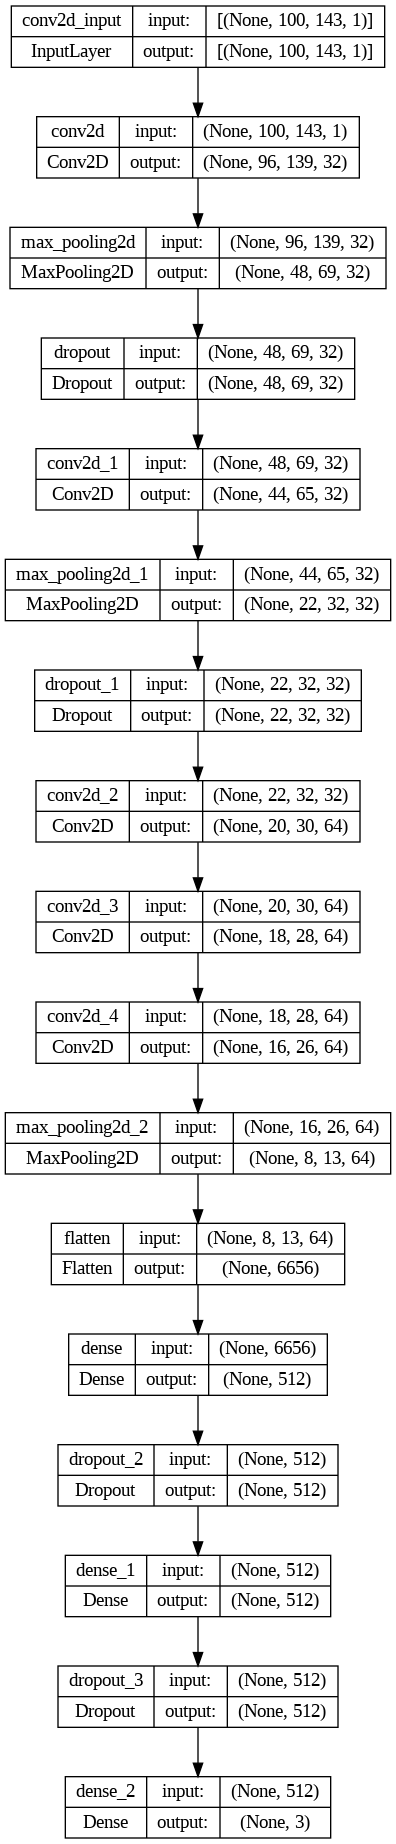

In [ ]:
tf.keras.utils.plot_model(
 modelo,
 to_file='model_plot_CNN.png',
 show_shapes=True,
 show_layer_names=True,
 rankdir='TB',
 expand_nested=True,
 dpi=96,
)

In [ ]:
# Treinamento do modelo
historico_treino = modelo.fit(
    conjunto_treino,
    epochs=15,  # Ajuste o número de épocas conforme necessário
    validation_data=conjunto_validacao,
)

# Avaliação do modelo
resultado_avaliacao = modelo.evaluate(conjunto_teste)
print(f'Avaliação do modelo nos dados de teste: {resultado_avaliacao}')

Epoch 1/15
51/51 [==============================] - 23s 380ms/step - loss: 0.6431 - mae: 0.6494 - accuracy: 0.3713 - val_loss: 0.5971 - val_mae: 0.6164 - val_accuracy: 0.3922
Epoch 2/15
51/51 [==============================] - 17s 338ms/step - loss: 0.6366 - mae: 0.6497 - accuracy: 0.3564 - val_loss: 0.5081 - val_mae: 0.5969 - val_accuracy: 0.3725
Epoch 3/15
51/51 [==============================] - 18s 359ms/step - loss: 0.6653 - mae: 0.6638 - accuracy: 0.3292 - val_loss: 0.5081 - val_mae: 0.5969 - val_accuracy: 0.3725
Epoch 4/15
51/51 [==============================] - 18s 340ms/step - loss: 0.6324 - mae: 0.6486 - accuracy: 0.3515 - val_loss: 0.6986 - val_mae: 0.6965 - val_accuracy: 0.2353
Epoch 5/15
51/51 [==============================] - 17s 338ms/step - loss: 0.6352 - mae: 0.6500 - accuracy: 0.3416 - val_loss: 0.6986 - val_mae: 0.6965 - val_accuracy: 0.2353
Epoch 6/15
51/51 [==============================] - 17s 340ms/step - loss: 0.6532 - mae: 0.6628 - accuracy: 0.3465 - val_loss

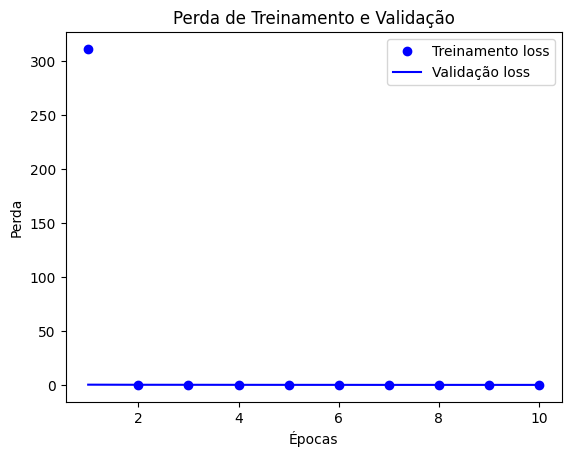

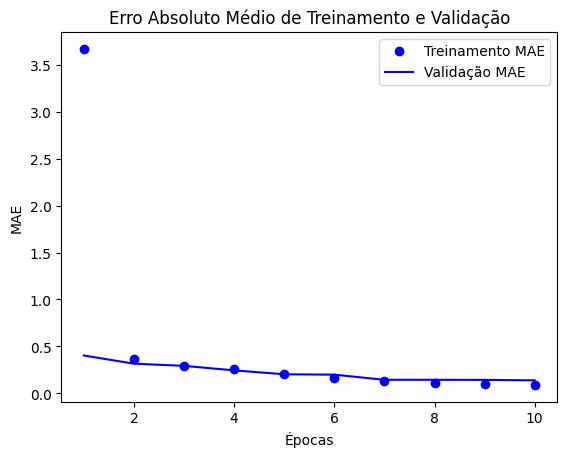

In [ ]:
# Extrair os resultados do histórico de treinamento
loss = historico_treino.history['loss']
mae = historico_treino.history['mae']
val_loss = historico_treino.history['val_loss']
val_mae = historico_treino.history['val_mae']

# Número de épocas
epocas = range(1, len(loss) + 1)

# Plotar a perda
plt.plot(epocas, loss, 'bo', label='Treinamento loss')
plt.plot(epocas, val_loss, 'b', label='Validação loss')
plt.title('Perda de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

# Plotar o MAE
plt.plot(epocas, mae, 'bo', label='Treinamento MAE')
plt.plot(epocas, val_mae, 'b', label='Validação MAE')
plt.title('Erro Absoluto Médio de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()

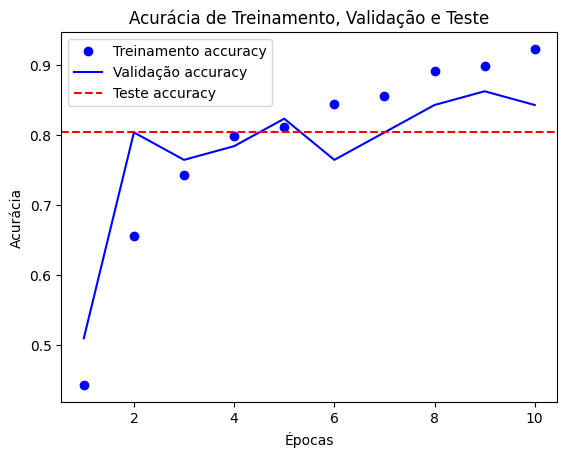

In [ ]:
# Extrair a acurácia do histórico de treinamento
accuracy = historico_treino.history['accuracy']
val_accuracy = historico_treino.history['val_accuracy']

# Extrair a acurácia do resultado de teste
accuracy_teste = resultado_avaliacao[2]  # A posição 2 corresponde à acurácia, ajuste conforme necessário

# Número de épocas
epocas = range(1, len(accuracy) + 1)

# Plotar a acurácia
plt.plot(epocas, accuracy, 'bo', label='Treinamento accuracy')
plt.plot(epocas, val_accuracy, 'b', label='Validação accuracy')
plt.axhline(y=accuracy_teste, color='r', linestyle='--', label='Teste accuracy')  # Adicionar linha para a acurácia do teste
plt.title('Acurácia de Treinamento, Validação e Teste')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()